In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import textwrap

df = pd.read_csv("masters_cleaned_final.csv")

print(df.head())
print(df.info())
print(df.player.value_counts())

        player  color          opponent result          event         site  \
0  Paul Morphy  white    Morphy, Alonzo    1-0    New Orleans  New Orleans   
1  Paul Morphy  white    Morphy, Alonzo    1-0    New Orleans  New Orleans   
2  Paul Morphy  white  Rousseau, Eugene    1-0    New Orleans  New Orleans   
3  Paul Morphy  white  Rousseau, Eugene    1-0    New Orleans  New Orleans   
4  Paul Morphy  white    Morphy, Alonzo    1-0  New Orleans m  New Orleans   

         date  year  eco                                  opening  plycount  
0  1848.??.??  1848  C23                         Bishop's Opening        61  
1  1848.??.??  1848  C33                   King’s Gambit Accepted        35  
2  1849.??.??  1849  C39  King’s Gambit Accepted, Allgaier Gambit        33  
3  1849.??.??  1849  C50                             Italian Game        45  
4  1849.??.??  1849  C51                             Evans Gambit        29  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8612 entries,

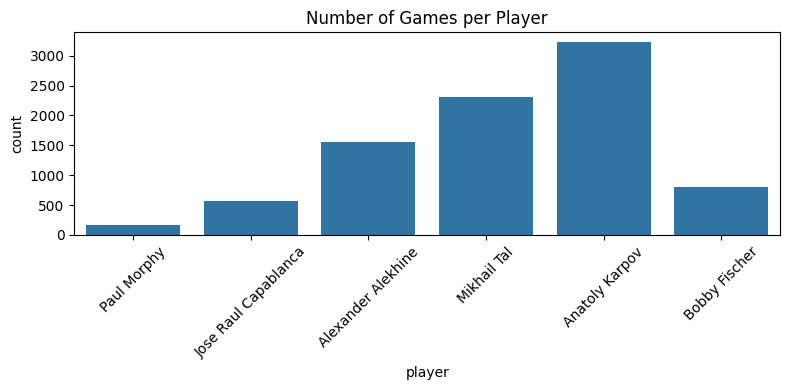

In [19]:
plt.figure(figsize=(8,4))
sns.countplot(x=df["player"])
plt.title("Number of Games per Player")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

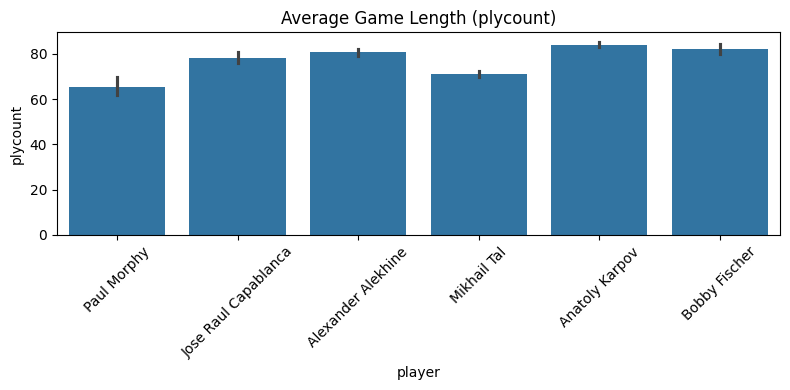

In [20]:
plt.figure(figsize=(8,4))
sns.barplot(x="player", y="plycount", data=df, estimator='mean')
plt.title("Average Game Length (plycount)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

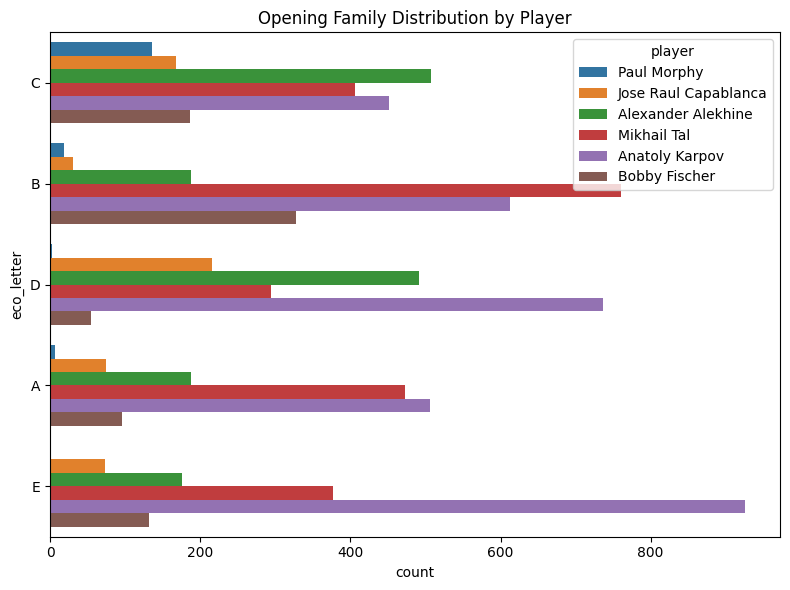

In [21]:
df["eco_letter"] = df["eco"].str[0]  # A/B/C/D/E

plt.figure(figsize=(8,6))
sns.countplot(y="eco_letter", hue="player", data=df)
plt.title("Opening Family Distribution by Player")
plt.tight_layout()
plt.show()


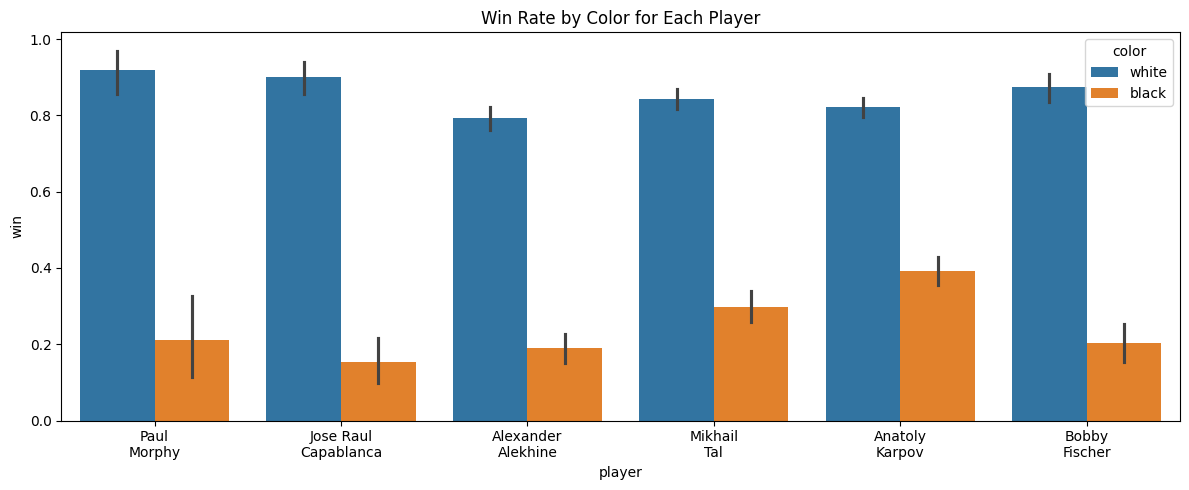

In [22]:



df["win"] = df["result"].apply(lambda x: 1 if x=="1-0" else (0 if x=="0-1" else None))


labels = [textwrap.fill(l, 10) for l in df["player"].unique()]

plt.figure(figsize=(12,5))
sns.barplot(data=df, x="player", y="win", hue="color")

plt.xticks(range(len(labels)), labels, rotation=0)
plt.title("Win Rate by Color for Each Player")
plt.tight_layout()
plt.show()
